In [ ]:
import torch 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
torch.manual_seed(0)

# Define the parameters for the k-dimensional Gaussian
k = 5  # Dimension
mean = torch.zeros(k)  # Mean vector of zeros
cov_matrix = torch.eye(k) * 0.5  # Diagonal covariance matrix with some variance
cov_matrix[0, 1] = cov_matrix[1, 0] = 0.3

In [10]:
mean[1] = 3.0

In [11]:
cov_matrix

tensor([[0.5000, 0.3000, 0.0000, 0.0000, 0.0000],
        [0.3000, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5000]])

In [12]:
mvn = torch.distributions.MultivariateNormal(loc=mean, covariance_matrix=cov_matrix)


In [14]:
num_samples = 1000
samples = mvn.sample((num_samples,))


In [15]:
sample_mean = samples.mean(dim=0)


In [17]:
samples

tensor([[ 0.4234,  2.3744, -0.2414,  1.3103,  0.3310],
        [-0.1115,  3.7497,  0.1881,  0.9824,  1.1217],
        [ 0.6691,  2.9242,  0.6589,  0.8903,  1.4177],
        ...,
        [-0.5402,  3.1874,  0.5130,  0.0469, -0.0207],
        [ 0.4360,  3.1894, -0.7154, -0.3125,  0.4120],
        [ 0.4795,  3.8517, -0.3120,  0.8855,  0.6719]])

In [20]:
torch.cov(samples.T)

tensor([[ 0.4743,  0.2618, -0.0097, -0.0031,  0.0327],
        [ 0.2618,  0.4588, -0.0262, -0.0167,  0.0236],
        [-0.0097, -0.0262,  0.4794, -0.0049,  0.0061],
        [-0.0031, -0.0167, -0.0049,  0.5197, -0.0130],
        [ 0.0327,  0.0236,  0.0061, -0.0130,  0.5030]])

In [2]:
x = torch.linspace(-3, 3, steps=1000)             # Points to evaluate the PDF


In [22]:
pca = PCA(n_components=2)
samples_2d = pca.fit_transform(samples.numpy())


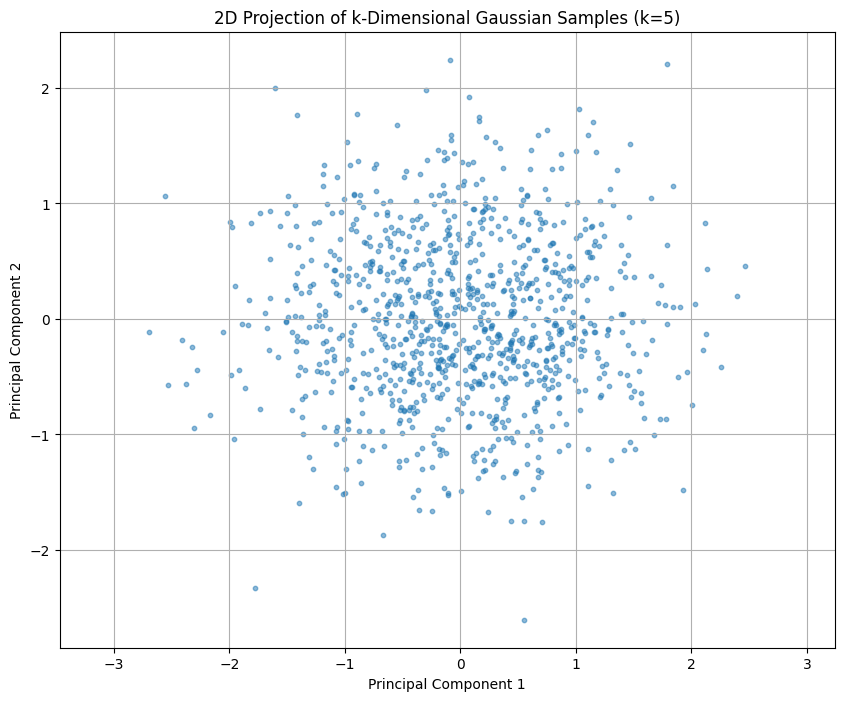

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(samples_2d[:, 0], samples_2d[:, 1], s=10, alpha=0.5)
plt.title('2D Projection of k-Dimensional Gaussian Samples (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axis('equal')
plt.show()

In [5]:
n1 = Normal(loc=0.0, scale=1.0)

In [ ]:
torch.exp(n1.log_prob(x))